In [1]:
import numpy as np
from numpy import random 
from matplotlib import pyplot as plt
rng = random.default_rng(seed = 1676)
import sound 

In [2]:
duration = .5
volume = .05

def make_sound(frequency,volume=.05,duration=.5):
    sample = sound.make_tone(frequency,duration,samplingrate=44100)
    sound.play_sound(sample,volume,samplingrate = 44100,block = True)
    return make_sound

In [3]:
def get_response(response):
    keep_looping = True
    while keep_looping:
        response = input('Which tone had a higher frequency?:')
        if response == '1':
            keep_looping = False
            return response
        elif response == '2':
            keep_looping = False
            return response

In [4]:
df = 250
A = 500
B = A + df #B is always higher frequency
def order_and_response(duration,volume=.05): 
    tone = rng.integers(1,3,1)
    if tone == 1:
        make_sound(A)
        make_sound(0,duration=.25)
        make_sound(B)
        response = get_response('Which tone had a higher frequency?')
        if response == '2':
            return 'correct'
        else:
            return 'incorrect'
    else:
        make_sound(B)
        make_sound(0,duration=.25)
        make_sound(A)
        response = get_response('Which tone had a higher frequency?')
        if response == '1':
            return 'correct'
        else:
            return 'incorrect'

In [ ]:
accuracy_list = list()
df_list = list()
incorrect_list = list()
correct_list = list()
reversals = 0
correct_streak = 0

while reversals<4:
    accuracy = order_and_response(.5)
    if accuracy == 'correct':
        df_list.append(df)
        correct_list.append(df)
        accuracy_list.append(accuracy)
        correct_streak = correct_streak + 1
        if correct_streak == 2:
            df = df/(np.sqrt(2))
            B = A + df
            correct_streak = correct_streak + 1
            correct_streak = 0
    else:
        df = df*(np.sqrt(2))
        B = A + df
        df_list.append(df)
        incorrect_list.append(df)
        accuracy_list.append(accuracy)
        reversals = reversals + 1
        correct_streak = 0
        
print(accuracy_list)
print(df_list)

['incorrect', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'incorrect', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'incorrect', 'correct', 'correct', 'correct', 'incorrect']
[353.5533905932738, 353.5533905932738, 353.5533905932738, 250.0, 250.0, 176.77669529663686, 176.77669529663686, 124.99999999999997, 124.99999999999997, 88.38834764831842, 88.38834764831842, 62.49999999999998, 62.49999999999998, 44.1941738241592, 44.1941738241592, 31.249999999999982, 31.249999999999982, 22.097086912079597, 22.097086912079597, 15.62499999999999, 15.62499999999999, 11.048543456039797, 11.048543456039797, 7.812499999999994, 7.812499999999994, 5.524271728019897, 5.524271728019897, 3.906249999999996, 3.9062499999

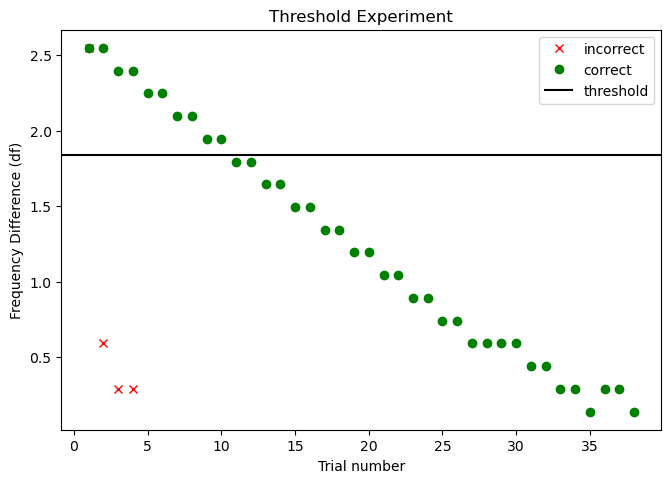

In [7]:
df_array = np.array(df_list)
accuracy_array = np.array(accuracy_list)
incorrect_array = np.array(incorrect_list)
correct_array = np.array(correct_list)
threshold = np.mean(df_array[-5:])

fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
x_correct = np.arange(1,1+len(correct_array),1)
x_incorrect = np.arange(1,1+len(incorrect_array),1)
ax.plot(x_incorrect,np.log10(incorrect_array),'rx',label='incorrect')
ax.plot(x_correct,np.log10(correct_array),'go',label='correct')
plt.axhline(threshold,color='k',linestyle='-',label='threshold')
ax.set_xlabel('Trial number')
ax.set_ylabel('Frequency Difference (df)')
ax.set_title('Threshold Experiment')
ax.legend()
plt.show()